In [78]:
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score

In [79]:
Data = pd.read_csv(r'C:\Users\Mtime\OneDrive\Bureau\500_Person_Gender_Height_Weight_Index.csv')
Data.head()

,Gender,Height,Weight,Index
0,Male,174,96,4
1,Male,189,87,2
2,Female,185,110,4
3,Female,195,104,3
4,Male,149,61,3


In [80]:
Data.describe

<bound method NDFrame.describe of      Gender  Height  Weight  Index
0      Male     174      96      4
1      Male     189      87      2
2    Female     185     110      4
3    Female     195     104      3
4      Male     149      61      3
..      ...     ...     ...    ...
495  Female     150     153      5
496  Female     184     121      4
497  Female     141     136      5
498    Male     150      95      5
499    Male     173     131      5

[500 rows x 4 columns]>

In [81]:
Data.isnull().sum()

Gender    0
Height    0
Weight    0
Index     0
dtype: int64

In [82]:
Data["Index"].unique()

array([4, 2, 3, 5, 1, 0], dtype=int64)

In [83]:
def give_name_to_index(Index):
    if Index==0:
        return 'So Weak'
    elif Index==1:
        return 'Weak'
    elif Index==2:
        return 'Normal'
    elif Index==3:
        return 'OverWeight'
    elif Index==4:
        return 'Obesity'
    elif Index==5:
        return 'Extrlemly obese'

In [84]:
Data["Index"] = Data["Index"].apply(give_name_to_index)

Text(0.5, 1.0, 'The Differents Weight Distribution by Index')

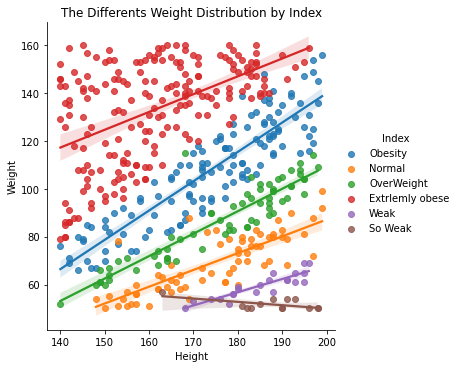

In [85]:
sns.lmplot(x="Height", y="Weight", hue= "Index", data=Data)
plt.title('The Differents Weight Distribution by Index')

Text(0.5, 1.0, 'The Distrbtion of Weight by Gender')

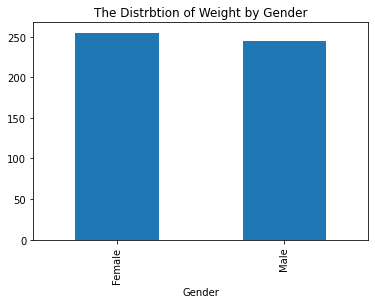

In [48]:
Data.groupby('Gender')['Weight'].size().plot(kind='bar')
plt.title('The Distrbtion of Weight by Gender')

In [49]:
Data[Data['Gender']=='Male']['Index'].value_counts()

Extrlemly obese    105
Obesity             59
OverWeight          32
Normal              28
Weak                15
So Weak              6
Name: Index, dtype: int64

In [50]:
Data[Data['Gender']=='Female']['Index'].value_counts()

Extrlemly obese    93
Obesity            71
Normal             41
OverWeight         36
Weak                7
So Weak             7
Name: Index, dtype: int64

In [51]:
Data2 = pd.get_dummies(Data['Gender'])
Data.drop('Gender',axis=1,inplace=True)
Data = pd.concat([Data,Data2],axis=1)

In [52]:
Data.head()

,Height,Weight,Index,Female,Male
0,174,96,Obesity,0,1
1,189,87,Normal,0,1
2,185,110,Obesity,1,0
3,195,104,OverWeight,1,0
4,149,61,OverWeight,0,1


In [53]:
y = Data['Index']
Data = Data.drop(['Index'], axis=1)

In [54]:
Scaler = StandardScaler()
Data = Scaler.fit_transform(Data)
Data = pd.DataFrame(Data)

In [55]:
Data.head()

,0,1,2,3
0,0.247939,-0.309117,-1.020204,1.020204
1,1.164872,-0.587322,-1.020204,1.020204
2,0.920357,0.123647,0.980196,-0.980196
3,1.531645,-0.061823,0.980196,-0.980196
4,-1.280283,-1.391027,-1.020204,1.020204


In [56]:
X_train, X_test, y_train, y_test = train_test_split(Data, y, test_size=0.3, random_state=101) 

In [57]:
param_grid = {'n_estimators':[100,200,300,400,500,600,700,800,1000]}
grid_cv = GridSearchCV(RandomForestClassifier(random_state=101),param_grid,verbose=3)
grid_cv.fit(X_train,y_train)
print(grid_cv.best_params_)

Fitting 5 folds for each of 9 candidates, totalling 45 fits
[CV 1/5] END ..................n_estimators=100;, score=0.857 total time=   0.2s
[CV 2/5] END ..................n_estimators=100;, score=0.886 total time=   0.1s
[CV 3/5] END ..................n_estimators=100;, score=0.829 total time=   0.1s
[CV 4/5] END ..................n_estimators=100;, score=0.786 total time=   0.2s
[CV 5/5] END ..................n_estimators=100;, score=0.900 total time=   0.2s
[CV 1/5] END ..................n_estimators=200;, score=0.843 total time=   0.4s
[CV 2/5] END ..................n_estimators=200;, score=0.900 total time=   0.8s
[CV 3/5] END ..................n_estimators=200;, score=0.843 total time=   0.4s
[CV 4/5] END ..................n_estimators=200;, score=0.829 total time=   0.4s
[CV 5/5] END ..................n_estimators=200;, score=0.886 total time=   1.1s
[CV 1/5] END ..................n_estimators=300;, score=0.843 total time=   1.7s
[CV 2/5] END ..................n_estimators=300;,

In [58]:
prediction = grid_cv.predict(X_test)

In [62]:
print(classification_report(y_test,prediction))

                 precision    recall  f1-score   support

Extrlemly obese       0.91      0.97      0.94        63
         Normal       0.92      0.96      0.94        23
        Obesity       0.78      0.82      0.79        38
     OverWeight       0.92      0.58      0.71        19
        So Weak       1.00      1.00      1.00         1
           Weak       0.83      0.83      0.83         6

       accuracy                           0.87       150
      macro avg       0.89      0.86      0.87       150
   weighted avg       0.88      0.87      0.87       150



In [63]:
print(confusion_matrix(y_test, prediction))

[[61  0  2  0  0  0]
 [ 0 22  0  0  0  1]
 [ 6  0 31  1  0  0]
 [ 0  1  7 11  0  0]
 [ 0  0  0  0  1  0]
 [ 0  1  0  0  0  5]]


In [66]:
print(accuracy_score(y_test, prediction)*100)

87.33333333333333


In [69]:
def lp(details):
    gender = details[0]
    height = details[1]
    weight = details[2]
    
    if gender=='Male':
        details=np.array([[np.float(height),np.float(weight),0.0,1.0]])
    elif gender=='Female':
        details=np.array([[np.float(height),np.float(weight),1.0,0.0]])
    
    y_pred = grid_cv.predict(Scaler.transform(details))
    return (y_pred[0])

In [76]:
your_details = ['Male',7,7]
print(lp(your_details))

OverWeight


C:\Users\Mtime\AppData\Local\Temp/ipykernel_64084/2401407290.py:7: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  details=np.array([[np.float(height),np.float(weight),0.0,1.0]])
C:\Users\Mtime\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
